## About the Boston Dataset 

#### Referance :-https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

Boston

![Image of Boston](BostonImage.png)

#### What do the column headers mean?


1. CRIM: This is the per capita crime rate by town
2. ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
3. INDUS: This is the proportion of non-retail business acres per town.
4. CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0        otherwise)
5. NOX: This is the nitric oxides concentration (parts per 10 million)
6. RM: This is the average number of rooms per dwelling
7. AGE: This is the proportion of owner-occupied units built prior to 1940
8. DIS: This is the weighted distances to five Boston employment centers
9. RAD: This is the index of accessibility to radial highways
10. TAX: This is the full-value property-tax rate per 10,000 dollors
11. PTRATIO: This is the pupil-teacher ratio by town
12. B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African       American descent by town
13. LSTAT: This is the percentage lower status of the population
14. MEDV: This is the median value of owner-occupied homes in 1000s dollors

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as ss
import pandas as pd  
import seaborn as sns
from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#check for missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
#Looging for relationship between Crime and house price
boston['MEDV'] = boston_dataset.target
x=boston['MEDV']


In [7]:
y = boston['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

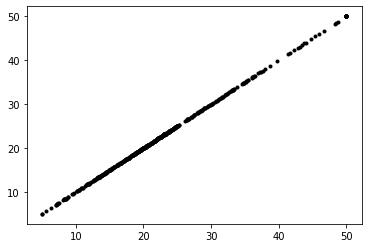

In [8]:
plt.plot(x,y,'k.')

In [9]:
##Graph Above maybe a liner, look at it
## setup a t-test



In [10]:
#avg B above 356, if more than 356 =1 else = 0
boston['check'] = np.where(boston['B']>356, 1, 0)

In [11]:
#
boston['moretoxix'] = np.where(boston['check']==1, boston['MEDV'],0)
boston['lesstoxic'] = np.where(boston['check']==0, boston['MEDV'],0)

In [12]:
l= boston['lesstoxic'][boston['lesstoxic'] != 0.00000].head(50)
m = boston['moretoxix'][boston['moretoxix'] != 0.00000].head(50)
#h

In [13]:
ss.ttest_ind(l,m)

Ttest_indResult(statistic=-1.9071596135650297, pvalue=0.05942839530233248)

In [14]:
import statsmodels.stats.weightstats as ws

In [15]:
ws.ttest_ind(l, m)

(-1.907159613565027, 0.05942839530233286, 98.0)

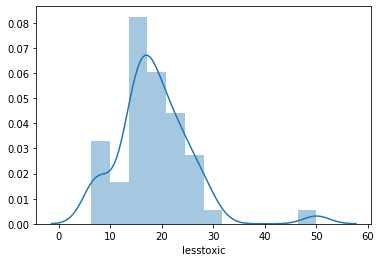

In [16]:
#seaborn plot
sns.distplot(l)

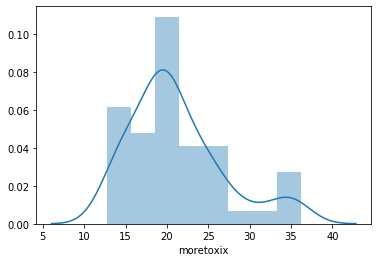

In [17]:
sns.distplot(m)

In [18]:
moreLess =['lesstoxic'] * 50 + ['moretoxic'] * 50
resML =  np.concatenate([m , l])
resML

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 18.2, 13.6, 19.6, 15.2,
       14.5, 15.6, 16.6, 18.4, 21. , 12.7, 14.5, 13.1, 18.9, 20. , 21. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 24.7, 21.2, 19.3, 20. , 16.6, 14.4,
       19.4, 19.7, 20.5, 25. , 23.4, 18.9, 20.2, 13.9, 14.8, 13.2, 13.5,
       18.6, 18.3, 20.4, 15.6, 13.8, 15.6, 15.4, 19.6, 15.3, 19.4, 17. ,
       15.6, 13.1, 24.3, 27. , 25. , 23.8, 23.8, 22.3, 17.4, 19.1, 30.3,
       23.7, 20.1, 16.1, 19.9, 16.8, 21.9, 27.5, 21.9, 23.1, 50. ,  8.8,
        6.3,  8.5, 27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,
        7.5])

In [19]:
df = pd.DataFrame({'moreLess':moreLess,'resML':resML})
df

,moreLess,resML
0,lesstoxic,24.0
1,lesstoxic,21.6
2,lesstoxic,34.7
3,lesstoxic,33.4
4,lesstoxic,36.2
5,lesstoxic,28.7
6,lesstoxic,22.9
7,lesstoxic,27.1
8,lesstoxic,16.5
9,lesstoxic,18.9


In [20]:
#get all the high values
df[df['moreLess']=='moretoxic']['resML']

50    20.2
51    13.9
52    14.8
53    13.2
54    13.5
55    18.6
56    18.3
57    20.4
58    15.6
59    13.8
60    15.6
61    15.4
62    19.6
63    15.3
64    19.4
65    17.0
66    15.6
67    13.1
68    24.3
69    27.0
70    25.0
71    23.8
72    23.8
73    22.3
74    17.4
75    19.1
76    30.3
77    23.7
78    20.1
79    16.1
80    19.9
81    16.8
82    21.9
83    27.5
84    21.9
85    23.1
86    50.0
87     8.8
88     6.3
89     8.5
90    27.9
91    17.2
92    27.5
93    15.0
94    17.2
95    17.9
96    16.3
97     7.0
98     7.2
99     7.5
Name: resML, dtype: float64

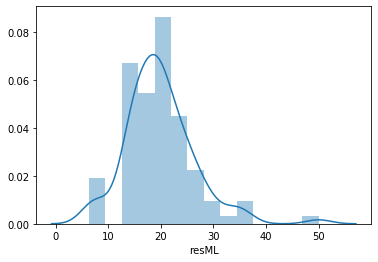

In [21]:
sns.distplot(df['resML'])

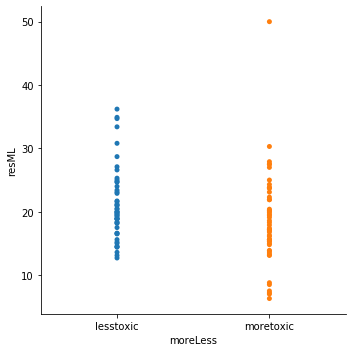

In [22]:
sns.catplot(x ='moreLess', y = 'resML',jitter=False,data=df)

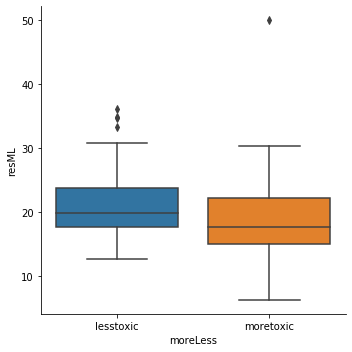

In [23]:
sns.catplot(x ='moreLess', y = 'resML',kind='box',data=df)

In [24]:

# For t-tests and ANOVA.
import scipy.stats as stats
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sampa= boston['CRIM'].values
sampb =boston['DIS'].values

meanA = np.mean(sampa)
popA = {'m': meanA, 's': 0.1}

meanB = np.mean(sampb)
popB = {'m': meanB, 's': 0.1}


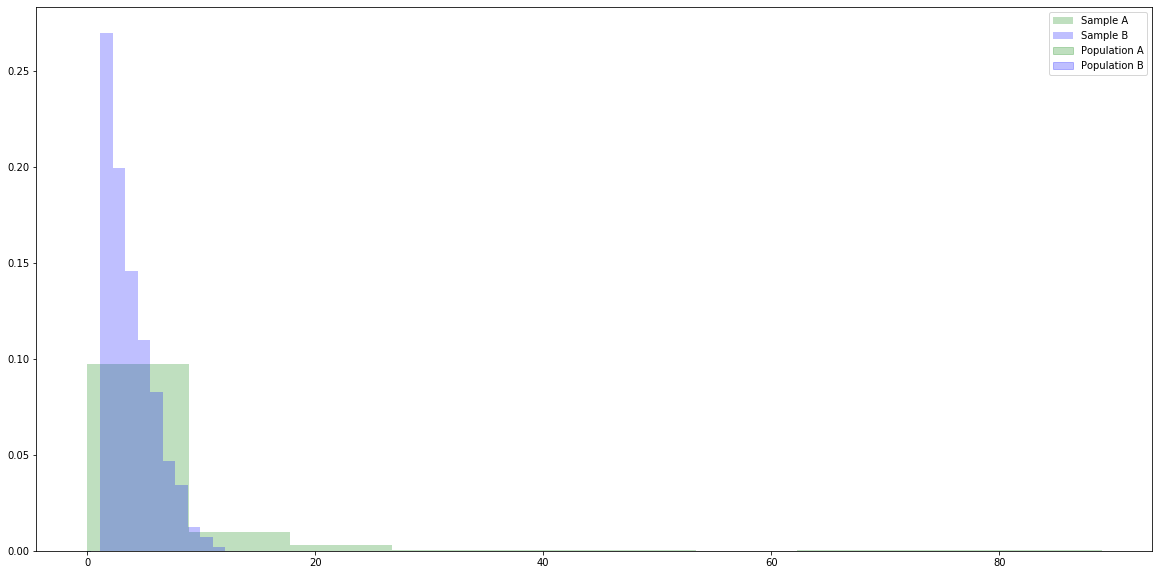

In [25]:
# x values for plotting.
x = np.linspace(0.25, 0.025, 500)

# The probability density functions (PDFs) for the two populations.
pdfA = stats.norm.pdf(x, popA['m'], popA['s'])
pdfB = stats.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampa, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampb, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

In [26]:
stats.ttest_ind(sampa,sampb)

Ttest_indResult(statistic=-0.4610867038844012, pvalue=0.6448356731766989)

In [27]:
##TTest
#get results when close to charles
#s is close.....r is not close
df = pd.read_csv("C:\ELN\BostonHousing.csv")
r = df[df['chas'] == 0].tail(35)
s = df[df['chas'] == 1].tail(35)


In [28]:
print(stats.ttest_ind(s['crim'], r['crim']))


Ttest_indResult(statistic=-1.6422754041078964, pvalue=0.10514995084472376)


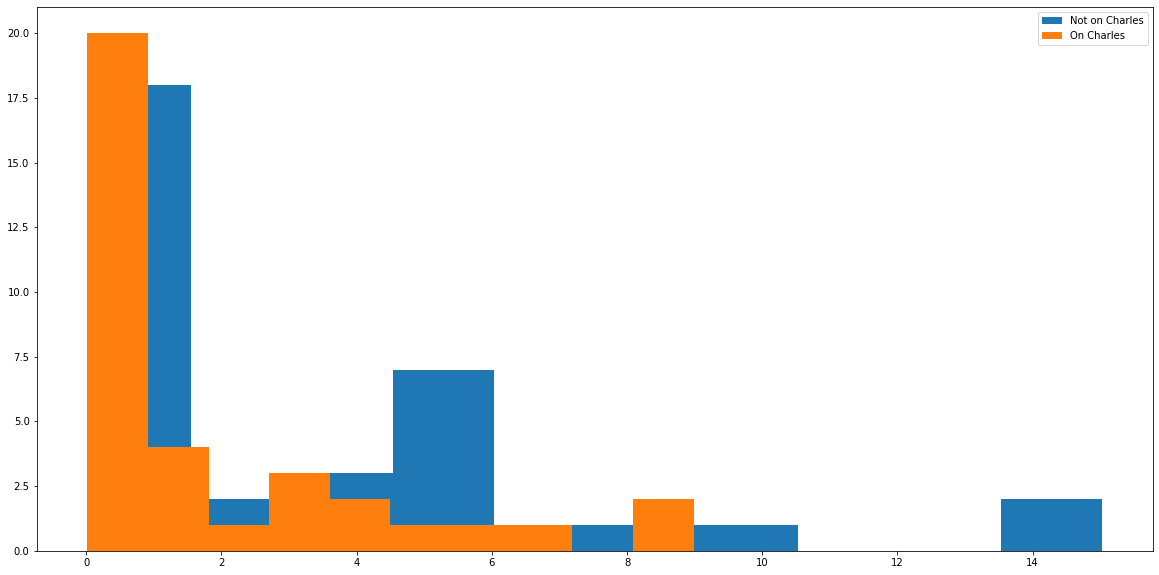

In [29]:
plt.hist(r['crim'], label='Not on Charles')
plt.hist(s['crim'], label='On Charles')
plt.legend()

plt.show()

In [30]:
stats.f_oneway(s['crim'], r['crim'])

F_onewayResult(statistic=2.697068502937755, pvalue=0.10514995084472378)

In [31]:
# Count the samples.
nA = float(len(sampa))
nB = float(len(sampb))

# Calculate the means.
mA = sampa.sum() / nA
mB = sampb.sum() / nB

# Sample variances.
varA = ((sampa - mA)**2).sum() / (nA - 1.0)
varB = ((sampb - mB)**2).sum() / (nB - 1.0)
# Pooled standard deviation.
sp = np.sqrt(((nA - 1.0) * varA + (nB - 1.0) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))

print(f"Mean of sample A:       {mA:8.4f}")
print(f"Mean of sample B:       {mB:8.4f}")
print(f"Size of sample A:       {nA:8.4f}")
print(f"Size of sample B:       {nB:8.4f}")
print(f"Variance of sample A:   {varA:8.4f}")
print(f"Variance of sample B:   {varB:8.4f}")
print(f"Pooled std dev:         {sp:8.4f}")
print(f"t-statistic:            {t:8.4f}")

Mean of sample A:         3.6135
Mean of sample B:         3.7950
Size of sample A:       506.0000
Size of sample B:       506.0000
Variance of sample A:    73.9866
Variance of sample B:     4.4340
Pooled std dev:           6.2618
t-statistic:             -0.4611


In [32]:
#Critical values¶
#For a two-tail test (e.g. H0: the means are equal) we reject the null hypothesis H0 if the value of the t-statistic from the samples is further away from zero than the t-statistic at the (0.5/2.0=) 0.025 level.

In [33]:
df= pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Char
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,False
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,False
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,False
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,False
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,False


# KNN 

In [34]:
import sklearn.neighbors as nei
import pandas as pd
import sklearn.model_selection as mod
import numpy as np

#### Referance :-https://www.youtube.com/watch?v=xGoRCVryUDk

In [35]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [36]:
bos =pd.DataFrame(boston['data'])
bos.columns = boston['feature_names']
bos['Price']= boston['target']
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
inputs =boston['data'][:500]
outputs = boston['target'][:500]

In [39]:
knr =KNeighborsRegressor(10)
knr.fit(inputs,outputs)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [40]:
test = np.array(boston['data'][500])
test1 =test.reshape(1,-1)
bos.loc[500:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [41]:
knr.predict(test1)

array([20.99])

# Simple Linear Regression
#### Referance :-https://blog.goodaudience.com/linear-regression-on-the-boston-housing-data-set-d18c4ce4d0be

#### Referance :-https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/


In [42]:
df = pd.DataFrame(boston.data)
df['MEDV'] = boston.target
df['LSTAT'] = boston.target

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,MEDV,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


### Create a heatmap of data correleations


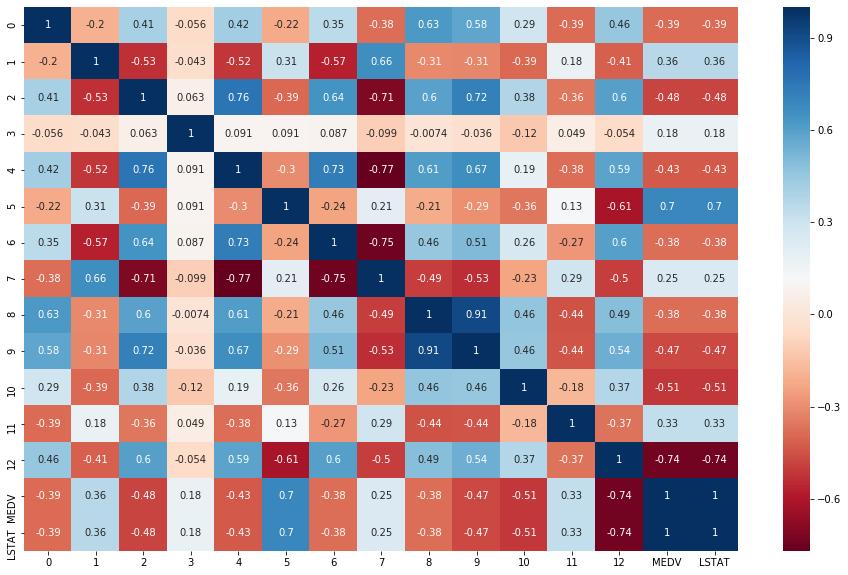

In [43]:
ax, fig = plt.subplots(figsize =(16,10))
sns.heatmap(df.corr(), annot = True, cmap ='RdBu')
plt.show()

#### MEDV and LSTAT at -0.74 at 0.7

In [44]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Importing Data 
from sklearn.datasets import load_boston 
boston = load_boston() 


In [45]:
boston.data.shape 


(506, 13)

In [46]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [47]:
data = pd.DataFrame(boston.data) 
data.columns = boston.feature_names 

data.head(10) 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [48]:
# Adding 'Price' (target) column to the data  
boston.target.shape

(506,)

In [49]:
data['Price'] = boston.target 
data.head() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
data.describe() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [52]:
# Input Data 
x = boston.data 

# Output Data 
y = boston.target 

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 




xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [53]:
# Fitting Multi Linear regression model to training model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 

# predicting the test set results 
y_pred = regressor.predict(xtest) 


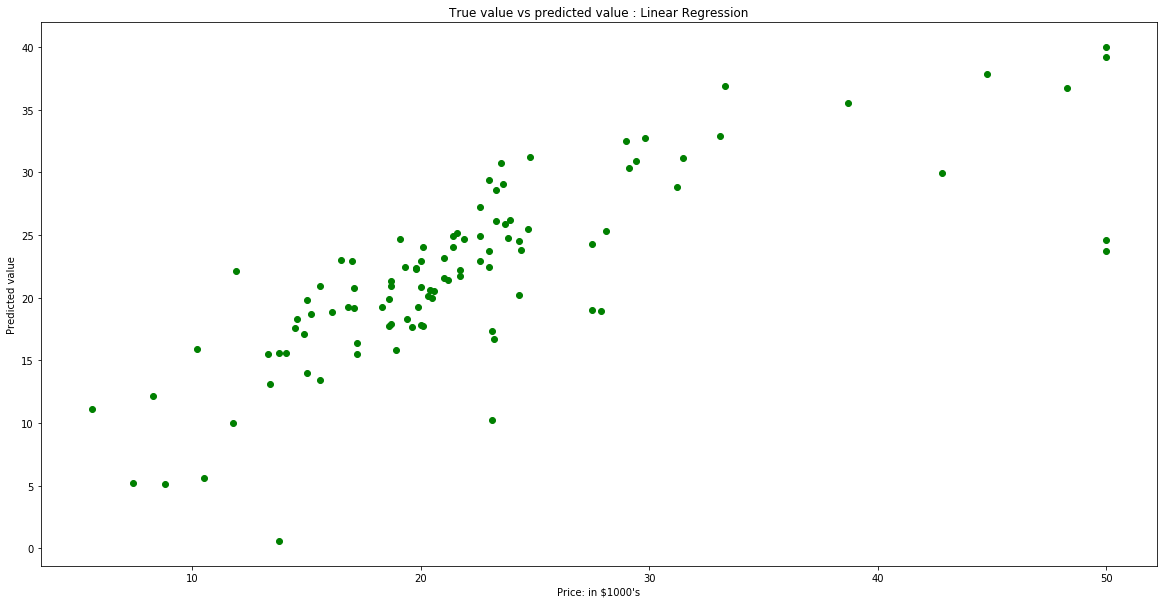

In [54]:
# Plotting Scatter graph to show the prediction 
# results - 'ytrue' value vs 'y_pred' value 
plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 


In [55]:
# Results of Linear Regression. 
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(ytest, y_pred) 
print("Mean Square Error : ", mse) 


Mean Square Error :  33.44897999767653


#### the result of our model is only 66.55% accurate. So model is not very good.

## Analysis of variance (ANOVA)
#### Referance :-https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb#Analysis-of-variance-(ANOVA)


In [56]:
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [57]:
# Set parameters for two populations.
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

# Create two samples, one from each population.
sampA = df['LSTAT']
sampB = df['MEDV']


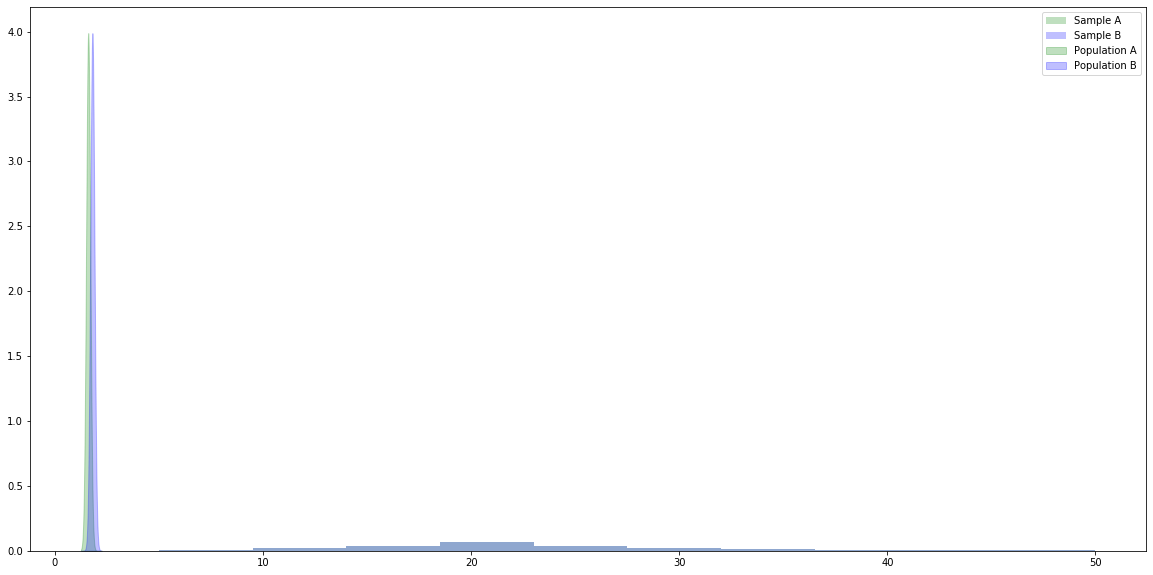

In [58]:
# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = stats.norm.pdf(x, popA['m'], popA['s'])
pdfB = stats.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

In [59]:
# Calculate the independent samples t-statistic for the samples.
# We also get the probability of seeing samples at least as different as these given the population means are equal.
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [60]:
# Count the samples.
nA = float(len(sampA))
nB = float(len(sampB))

# Calculate the means.
mA = sampA.sum() / nA
mB = sampB.sum() / nB

# Sample variances.
varA = ((sampA - mA)**2).sum() / (nA - 1.0)
varB = ((sampB - mB)**2).sum() / (nB - 1.0)

# Pooled standard deviation.
sp = np.sqrt(((nA - 1.0) * varA + (nB - 1.0) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))
print(f"Mean of sample A:       {mA:8.4f}")
print(f"Mean of sample B:       {mB:8.4f}")
print(f"Size of sample A:       {nA:8.4f}")
print(f"Size of sample B:       {nB:8.4f}")
print(f"Variance of sample A:   {varA:8.4f}")
print(f"Variance of sample B:   {varB:8.4f}")
print(f"Pooled std dev:         {sp:8.4f}")
print(f"t-statistic:            {t:8.4f}")

Mean of sample A:        22.5328
Mean of sample B:        22.5328
Size of sample A:       506.0000
Size of sample B:       506.0000
Variance of sample A:    84.5867
Variance of sample B:    84.5867
Pooled std dev:           9.1971
t-statistic:              0.0000


1.9623155373028414


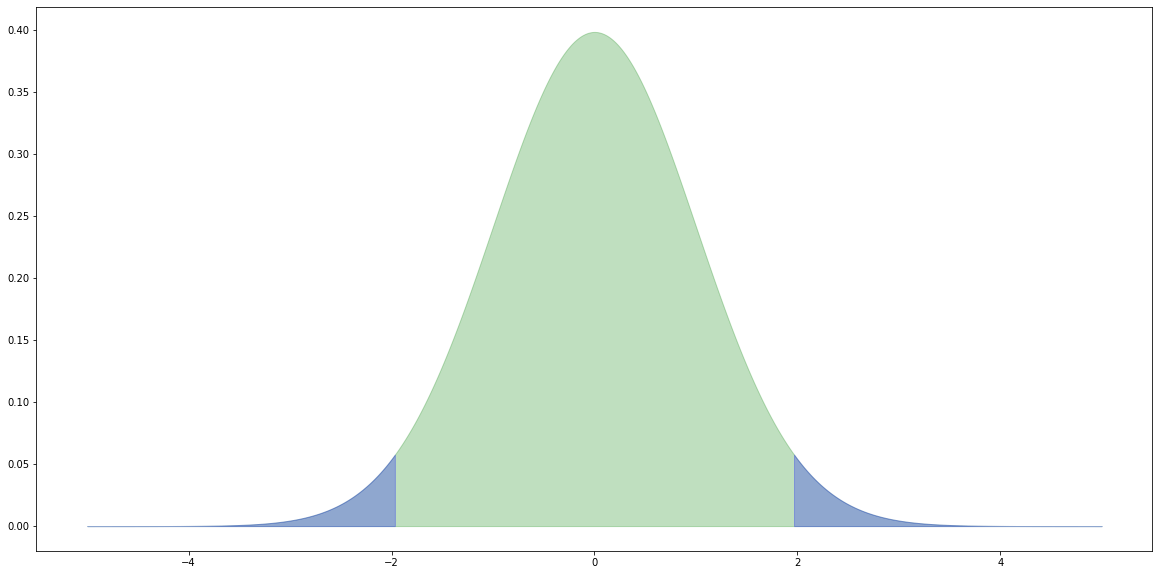

In [61]:
# x values for plotting.
x = np.linspace(-5.0, 5.0, 1000)

# The probability density functions (PDFs) for the t distribution.
# The number of degrees of freedom is (nA + nB - 2).
pdf = stats.t.pdf(x, (nA + nB - 2.0))

# Create a dataframe from x and pdf.
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution.
plt.fill_between(df['x'], df['y'], color='g', alpha=0.25)

# Plot the values more extreme than our |t|.
crit = np.abs(stats.t.ppf(0.975, nA + nB - 2.0))
tail1 = df[df['x'] >=  crit]
tail2 = df[df['x'] <= -crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='b', alpha=0.25)

print(crit)

plt.show()

In [62]:
m = 10.0
s = 1.0
t = 1000
a = 0.05

sum([1 if stats.ttest_ind(np.random.normal(m, s, 100), np.random.normal(m, s, 100))[1] <= a else 0 for i in range(t)])

59

# Neurons in keras
#### Referance :-https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb


In [63]:
import keras as kr
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [64]:
plt.rcParams['figure.figsize'] = (10, 10)

In [65]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [66]:
# Create some input values.

x =data['Price'].head(50)

# Run each x value through the neural network.
y = m.predict(x)

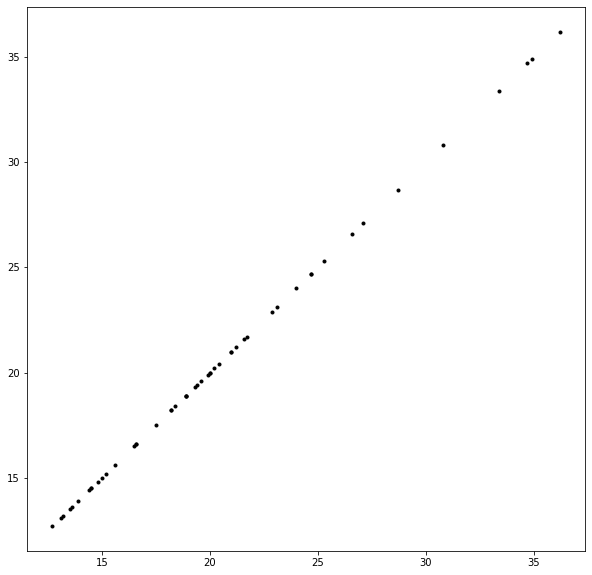

In [67]:
# Plot the values.
plt.plot(x, y, 'k.')

In [68]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 2 and bias 1.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer=kr.initializers.Constant(value=2), bias_initializer=kr.initializers.Constant(value=1)))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [69]:
# Create some input values.

x =data['Price'].head(50)

# Run each x value through the neural network.
y = m.predict(x)

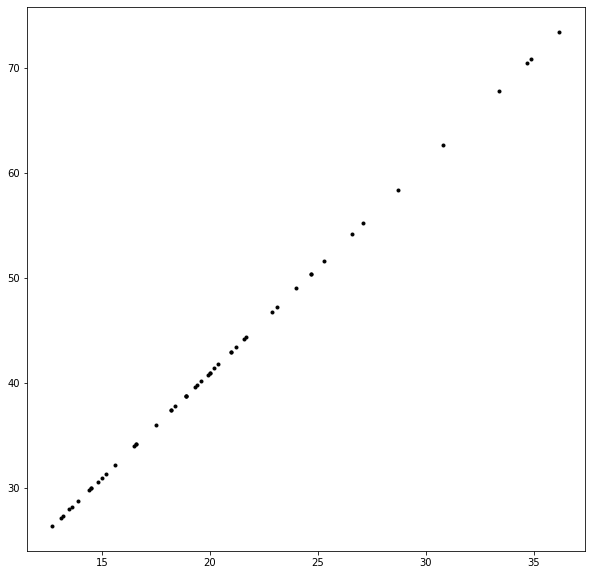

In [70]:
# Plot the values.
plt.plot(x, y, 'k.')

## Two neurons

***

$$ y = w_{1,1} x_1 + b_{1,1} + w_{1,2} x_1 + b_{1,2} $$

In [71]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a two neurons in a single layer.
m.add(kr.layers.Dense(2, input_dim=1, activation="linear"))

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, activation="linear", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))

# Set the weight/bias of the two neurons.
m.layers[0].set_weights([np.matrix([2, 3]), np.array([-5, -3])])

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [72]:
# Create some input values.

x =data['Price'].head(50)

# Run each x value through the neural network.
y = m.predict(x)

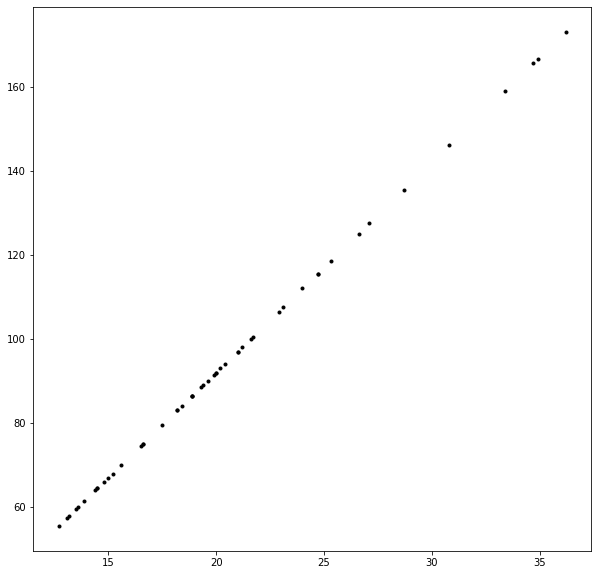

In [73]:
# Plot the values.
plt.plot(x, y, 'k.')

***

## Sigmoid

$$ S(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1} $$

In [74]:
# Create a new neural network.
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0, with sigmoid activation.
m.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer=kr.initializers.Constant(value=1), bias_initializer=kr.initializers.Constant(value=0)))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [75]:
# Create some input values.

x =data['Price'].head(50)

# Run each x value through the neural network.
y = m.predict(x)

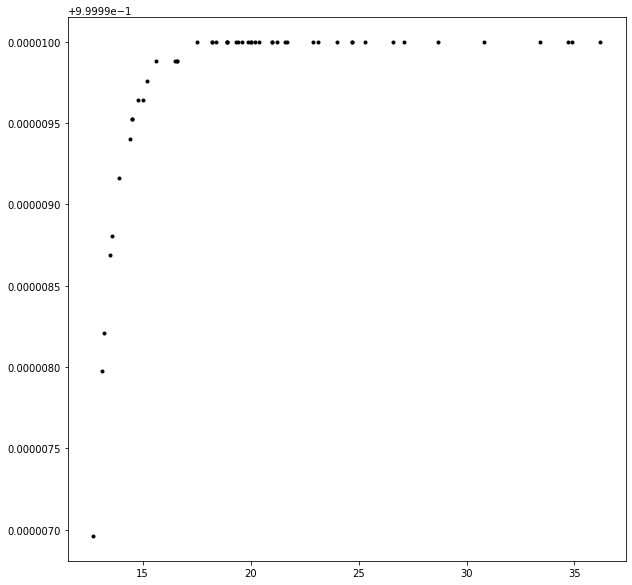

In [76]:
plt.plot(x, y, 'k.')

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import keras as kr

In [78]:
# Load the iris data set from a URL.
df = pd.read_csv("BostonHousing.csv")

In [79]:
plt.rcParams['figure.figsize'] = (10, 10)

In [80]:
x = df['medv']

In [81]:
y_l = (3.0 * x) + 5.0

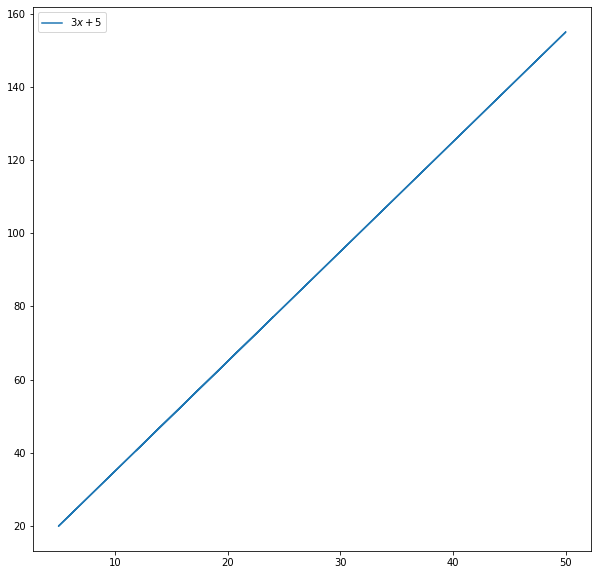

In [82]:
plt.plot(x, y_l, label='$3x + 5$')
plt.legend()

Epoch 1/95
506/506 [==============================] - 1s 1ms/step - loss: 6147.6822
Epoch 2/95
506/506 [==============================] - 0s 294us/step - loss: 5779.9486
Epoch 3/95
506/506 [==============================] - 0s 229us/step - loss: 5285.2731
Epoch 4/95
506/506 [==============================] - 0s 275us/step - loss: 4747.6744
Epoch 5/95
506/506 [==============================] - 0s 277us/step - loss: 4132.5317
Epoch 6/95
506/506 [==============================] - 0s 249us/step - loss: 3463.2865
Epoch 7/95
506/506 [==============================] - 0s 196us/step - loss: 2798.4462
Epoch 8/95
506/506 [==============================] - 0s 194us/step - loss: 2193.6773
Epoch 9/95
506/506 [==============================] - 0s 188us/step - loss: 1696.5958
Epoch 10/95
506/506 [==============================] - 0s 202us/step - loss: 1318.8161
Epoch 11/95
506/506 [==============================] - 0s 164us/step - loss: 1054.6972
Epoch 12/95
506/506 [==============================] -

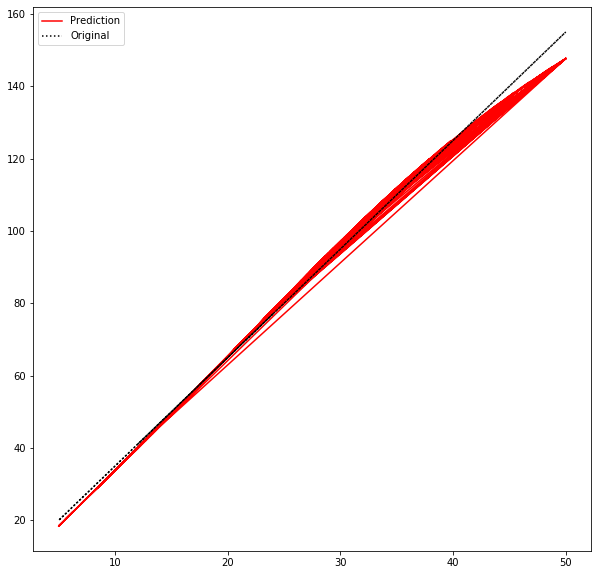

In [83]:
y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(10, input_dim=1, activation="tanh"))
m.add(kr.layers.Dense(10, activation="linear")) #sigmoid
m.add(kr.layers.Dense(1, activation='linear'))# output 1

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model. epochs is number of pass
m.fit(x, y, epochs=95, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

In [86]:

df['ISClose'] = (df['chas'] == 1).astype(np.int)
df['ISNOtClose'] = (df['chas'] == 0).astype(np.int)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Char,ISClose,ISNOtClose
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False,0,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False,0,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False,0,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,False,0,1
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,False,0,1
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,False,0,1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,False,0,1
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,False,0,1


In [143]:
inputs = df[['ISNOtClose','ISClose','b','ptratio','rm','age','indus','nox','dis','rad','tax','crim','lstat','zn']]
#inputs = df[['ISNOtClose','ISClose','b','ptratio','rm','age','crim']]
#inputs

In [144]:
outputs =df['medv']
#outputs

In [250]:
# Create a new neural network.
m = kr.models.Sequential()
# Add neurons
#dim 5 is the amout of colums

m.add(kr.layers.Dense(130, input_dim=14, activation='relu', kernel_initializer='normal'))
m.add(kr.layers.Dense(100,  activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))
#m.add(kr.layers.Dense(100, input_dim=7, activation="sigmoid"))
#m.add(kr.layers.Dense(30,  activation="linear"))
#m.add(kr.layers.Dense(20,  activation="linear"))
#m.add(kr.layers.Dense(10,  activation="linear"))
#m.add(kr.layers.Dense(1, activation='linear'))# output 1

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")




In [260]:
m.fit(inputs,outputs,epochs=10, batch_size=10)

Epoch 1/10
506/506 [==============================] - 1s 2ms/step - loss: 20.1277
Epoch 2/10
506/506 [==============================] - 1s 2ms/step - loss: 18.9755
Epoch 3/10
506/506 [==============================] - 2s 4ms/step - loss: 25.5679
Epoch 4/10
506/506 [==============================] - 1s 1ms/step - loss: 21.6101
Epoch 5/10
506/506 [==============================] - 0s 488us/step - loss: 20.2176
Epoch 6/10
506/506 [==============================] - 0s 931us/step - loss: 19.2615
Epoch 7/10
506/506 [==============================] - 0s 794us/step - loss: 18.5596
Epoch 8/10
506/506 [==============================] - 0s 660us/step - loss: 21.9996
Epoch 9/10
506/506 [==============================] - 2s 3ms/step - loss: 19.0647
Epoch 10/10
506/506 [==============================] - 2s 4ms/step - loss: 19.3463


In [261]:
m.predict(inputs)

array([[27.426115 ],
       [20.724014 ],
       [26.138884 ],
       [29.958117 ],
       [26.247503 ],
       [25.619207 ],
       [18.531256 ],
       [16.7664   ],
       [13.291835 ],
       [15.9627285],
       [15.967984 ],
       [17.838167 ],
       [18.405722 ],
       [19.444487 ],
       [17.471327 ],
       [19.483673 ],
       [21.21515  ],
       [16.273987 ],
       [11.484034 ],
       [17.643633 ],
       [14.497478 ],
       [17.271847 ],
       [16.066563 ],
       [16.029982 ],
       [16.762094 ],
       [11.290303 ],
       [15.948102 ],
       [11.618462 ],
       [17.824265 ],
       [17.287127 ],
       [12.87033  ],
       [17.41033  ],
       [ 6.0998507],
       [14.284741 ],
       [10.197085 ],
       [20.186125 ],
       [17.904703 ],
       [21.371586 ],
       [21.353851 ],
       [27.804989 ],
       [32.89525  ],
       [25.363813 ],
       [23.992533 ],
       [24.292131 ],
       [20.458242 ],
       [21.320705 ],
       [20.04267  ],
       [17.08

In [262]:
outputs.as_matrix() #turned PD as numpy array

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [263]:
np.around(m.predict(inputs).T)

array([[27., 21., 26., 30., 26., 26., 19., 17., 13., 16., 16., 18., 18.,
        19., 17., 19., 21., 16., 11., 18., 14., 17., 16., 16., 17., 11.,
        16., 12., 18., 17., 13., 17.,  6., 14., 10., 20., 18., 21., 21.,
        28., 33., 25., 24., 24., 20., 21., 20., 17., 14., 17., 19., 20.,
        24., 23., 16., 29., 23., 33., 21., 20., 17., 17., 21., 20., 23.,
        26., 21., 22., 19., 21., 23., 20., 24., 22., 24., 19., 16., 19.,
        17., 20., 24., 22., 22., 21., 21., 22., 20., 21., 28., 25., 21.,
        22., 21., 23., 20., 20., 19., 31., 29., 24., 20., 21., 17., 17.,
        17., 16., 15., 16., 18., 16., 18., 20., 16., 16., 19., 13., 18.,
        19., 12., 17., 18., 18., 18., 16., 18., 19., 15., 15., 16., 15.,
        18., 18., 18., 15., 12., 16., 14., 17., 14., 15., 13., 11., 15.,
        14., 13., 11., 15., 13., 11., 13., 17., 16., 16., 13., 15., 15.,
        16., 30., 25., 24., 28., 38., 43., 40., 19., 16., 34., 11., 16.,
        17., 13., 17., 19., 22., 21., 26., 21., 25.

In [264]:
m.predict(inputs).T -outputs.as_matrix() # .T turns rows 

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 3.42611504e+00, -8.75985718e-01, -8.56111641e+00,
        -3.44188347e+00, -9.95249672e+00, -3.08079262e+00,
        -4.36874428e+00, -1.03336006e+01, -3.20816517e+00,
        -2.93727150e+00,  9.67984200e-01, -1.06183281e+00,
        -3.29427834e+00, -9.55513382e-01, -7.28673172e-01,
        -4.16326904e-01, -1.88484917e+00, -1.22601318e+00,
        -8.71596642e+00, -5.56367111e-01,  8.97477531e-01,
        -2.32815323e+00,  8.66562653e-01,  1.52998161e+00,
         1.16209450e+00, -2.60969677e+00, -6.51898003e-01,
        -3.18153839e+00, -5.75735474e-01, -3.71287346e+00,
         1.70329857e-01,  2.91032982e+00, -7.10014935e+00,
         1.18474140e+00, -3.30291462e+00,  1.28612480e+00,
        -2.09529686e+00,  3.71585846e-01, -3.34614868e+00,
        -2.99501114e+00, -2.00475159e+00, -1.23618660e+00,
        -1.30746727e+00, -4.07868576e-01, -7.41757584e-01,
         2.02070541e+00,  4.26692963e-02,  4.80736160e-01,
        -4.82120514e-03, -2.42046585e+00, -6.89824295e-0

In [265]:
np.sqrt(np.sum((m.predict(inputs).T -outputs.as_matrix())**2))
#common way to measure 2 arrays

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


116.29740970642011